<a href="https://colab.research.google.com/github/esrayuzgec/parkinsonvsalz/blob/main/vgg19%20parkinson%20alz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 5.2 MB/s 
     |████████████████████████████████| 451 kB 58.2 MB/s 
     |████████████████████████████████| 1.3 MB 70.3 MB/s 
     |████████████████████████████████| 5.8 MB 64.5 MB/s 
     |████████████████████████████████| 1.6 MB 62.0 MB/s 
     |████████████████████████████████| 132 kB 63.9 MB/s 
     |████████████████████████████████| 182 kB 85.9 MB/s 
     |████████████████████████████████| 212 kB 78.8 MB/s 
     |████████████████████████████████| 127 kB 71.6 MB/s 
     |████████████████████████████████| 7.6 MB 84.1 MB/s 
Mounted at /content/gdrive


In [3]:

!pip install timm
import timm
from fastbook import *
import timm
from fastai.vision.all import *
from timm import create_model
from fastai.vision.learner import _update_first_layer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 549 kB 5.3 MB/s 


In [4]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"esrayuzgec","key":"49f0db0ca0e7ac60ce926c0e1460c4b6"}'}

In [6]:
!mkdir –p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600  ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d farjanakabirsamanta/alzheimer-diseases-3-class

 51% 25.0M/48.7M [00:00<00:00, 83.4MB/s]
100% 48.7M/48.7M [00:00<00:00, 126MB/s] 


In [8]:
from zipfile import ZipFile
file_name="alzheimer-diseases-3-class.zip"    

In [9]:
with ZipFile(file_name,'r') as zip:  #Zip halinde gelenn dosyayı  açtık
  zip.extractall()
  print('done')

done


In [10]:

from fastai.vision.all import *
     

In [11]:

path= Path('/content/3_cls/train')

In [12]:

all_files= get_image_files(path)

In [13]:
from fastai.vision.augment import contrast
tfms = aug_transforms(size=512, 
                      min_scale=0.25,
                      do_flip=False,
                      flip_vert=False,
                      max_rotate=0,
                      max_warp=0,
                    
                      max_zoom=0.50,
                      max_lighting=0.70,
                      p_lighting=0.60
                      
                      )
     

In [14]:




dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=RandomSplitter(valid_pct=0.1),
                 get_y=parent_label,
                 item_tfms=Resize(512,method='squish'),
                 batch_tfms=Normalize.from_stats(*imagenet_stats)
                 
                 
)
     

In [15]:

dls= dblock.dataloaders(all_files)

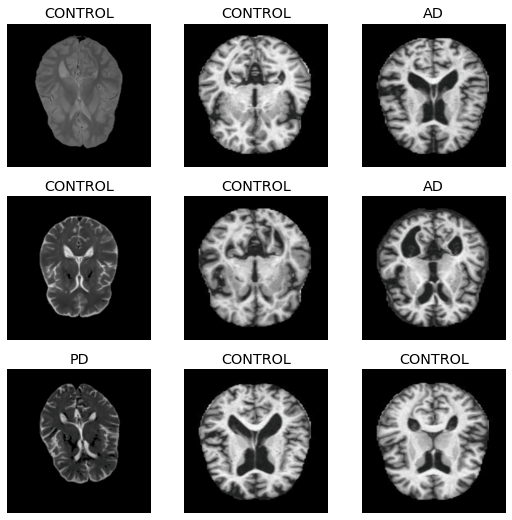

In [16]:
dls.show_batch()

In [17]:
print("Number of examples in testing:", len(dls.valid_ds))

Number of examples in testing: 647


In [18]:

learn = vision_learner(dls, vgg16,metrics=accuracy)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0008317637839354575)

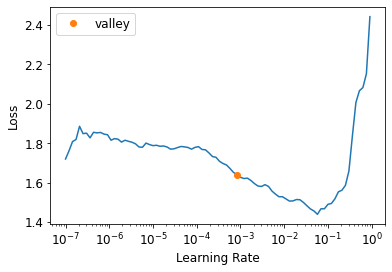

In [19]:

learn.lr_find()
     

In [20]:
learn.fit_one_cycle(100,1.6e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.332059,0.934756,0.641422,04:17
1,1.148300,0.844037,0.684699,04:17
2,0.986249,0.741918,0.717156,04:18
3,0.887363,0.682647,0.735703,04:18
4,0.763719,0.629363,0.752705,04:18
5,0.666424,0.585229,0.769706,04:18
6,0.597346,0.516342,0.792890,04:18
7,0.528276,0.461044,0.809892,04:17
8,0.484289,0.442404,0.814529,04:18
9,0.440684,0.464055,0.816074,04:18


epoch,train_loss,valid_loss,accuracy,time
0,1.332059,0.934756,0.641422,04:17
1,1.148300,0.844037,0.684699,04:17
2,0.986249,0.741918,0.717156,04:18
3,0.887363,0.682647,0.735703,04:18
4,0.763719,0.629363,0.752705,04:18
5,0.666424,0.585229,0.769706,04:18
6,0.597346,0.516342,0.792890,04:18
7,0.528276,0.461044,0.809892,04:17
8,0.484289,0.442404,0.814529,04:18
9,0.440684,0.464055,0.816074,04:18


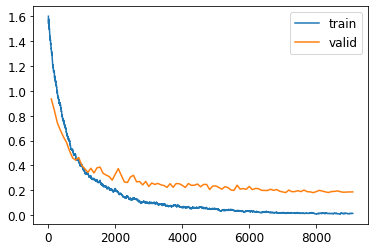

In [21]:
learn.recorder.plot_loss()

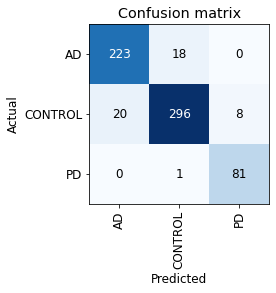

In [22]:


interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
     

In [23]:


interp.print_classification_report()
     

              precision    recall  f1-score   support

          AD       0.92      0.93      0.92       241
     CONTROL       0.94      0.91      0.93       324
          PD       0.91      0.99      0.95        82

    accuracy                           0.93       647
   macro avg       0.92      0.94      0.93       647
weighted avg       0.93      0.93      0.93       647



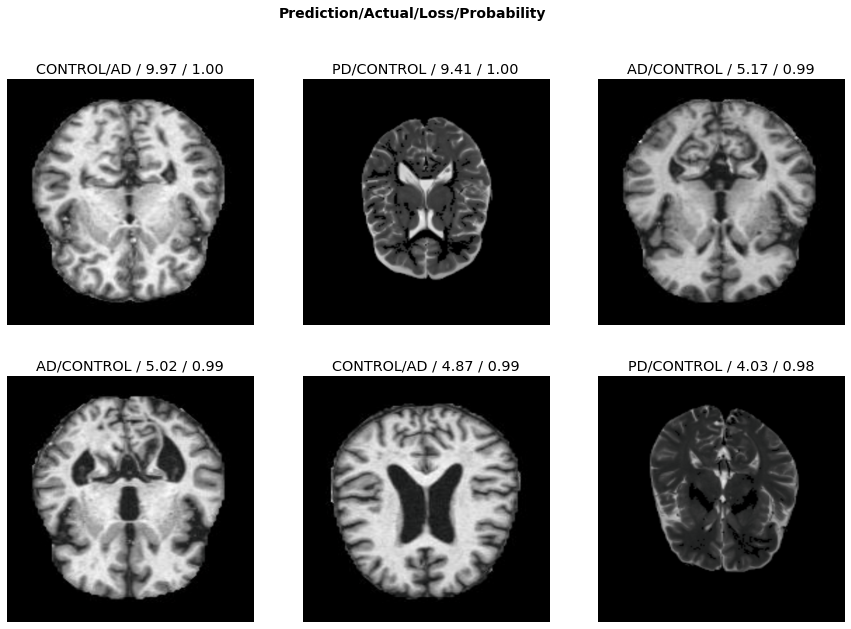

In [24]:
interp.plot_top_losses(6, figsize=(15,10))


In [25]:
path2=Path('/content/gdrive/MyDrive')

In [26]:

learn.save(path2/'alzparkinson_3cls_vgg19')


Path('/content/gdrive/MyDrive/alzparkinson_3cls_vgg19.pth')

In [27]:
learn.export=(path2/'alzparkinson_3cls_vgg19.pkl')

In [31]:
path=('/content/3_cls')
all_files= get_image_files(path)

In [32]:

dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=GrandparentSplitter(train_name='train', valid_name='test'),
                 get_y=parent_label,
                 item_tfms=Resize(512,method='squish'),
                 batch_tfms=Normalize.from_stats(*imagenet_stats)
                 
                 
)
     

In [33]:
dls_test = dblock.dataloaders(all_files)

In [34]:

print("Number of examples in testing:", len(dls_test.valid_ds))

Number of examples in testing: 1362


In [37]:
learn1 = vision_learner(dls_test, vgg16, metrics=accuracy).load('/content/gdrive/MyDrive/alzparkinson_3cls_vgg19')


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


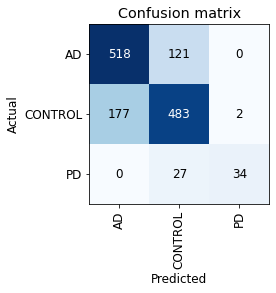

In [38]:

interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

In [39]:
preds, targs = learn1.tta()
accuracy(preds, targs).item()

0.7599118947982788